In [1]:
import numpy as np                 # For Numerical Calculation              
import pandas as pd                # For Data Manipulation
import matplotlib.pyplot as plt    # For Data Visualization
import seaborn as sns              # For Data Visualization
%matplotlib inline

In [2]:
# Hide the warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df1=pd.read_csv('Table1.csv')
df1.head(10)

,ShoeName,Category(Men/Women),no of colors,Price in Rs
0,Nike Air Force 1 '07 LV8,Men's Shoes,1 Colour,10795
1,Nike Air Force 1 Shadow,Women's Shoes,1 Colour,9295
2,NikeCourt Legacy Suede,Men's Shoes,1 Colour,5995
3,Nike Air Force 1 '07,Men's Shoes,2 Colours,11895
4,NikeCourt Legacy Next Nature,Women's Shoes,4 Colours,5695
5,Nike Killshot 2,Women's Shoes,2 Colours,8595
6,Nike Tech Hera,Women's shoes,6 Colours,9695
7,Nike Waffle Debut,Men's Shoes,1 Colour,7095
8,Nike P-6000,Shoe,1 Colour,7995
9,Nike Phoenix Waffle,Women's Shoes,4 Colours,8695


In [4]:
df2=pd.read_csv('Table2.csv')

In [5]:
df2.head(10)

,Sizes,No. of stars,No. of reviews,Style_code
0,UK 6 (EU 40),--,Reviews (0),Style: FJ4170-002
1,UK 6.5,--,Reviews (0),Style: DO7449-111
2,UK 7,--,Reviews (2),Style: DH0956-002
3,UK 7.5,--,Reviews (0),Style: FJ4146-100
4,UK 8,--,Reviews (0),Style: FZ4627-400
5,UK 8.5,--,Reviews (0),Style: FZ5630-001
6,UK 9,--,Reviews (70),Style: DR9761-401
7,UK 9.5,--,Reviews (0),Style: FJ4195-001
8,UK 10,--,Reviews (20),Style: CD6404-101
9,UK 10.5,--,Reviews (32),Style: FD2196-101


In [6]:
df=pd.concat([df1,df2],axis=1)

In [ ]:
data=df.to_csv('shoe_data.csv',index=False)

In [7]:
data=pd.read_csv('shoe_data.csv')
data.head(10)

,ShoeName,Category(Men/Women),no of colors,Price in Rs,Sizes,No. of stars,No. of reviews,Style_code
0,Nike Air Force 1 '07 LV8,Men's Shoes,1 Colour,10795,UK 6 (EU 40),--,Reviews (0),Style: FJ4170-002
1,Nike Air Force 1 Shadow,Women's Shoes,1 Colour,9295,UK 6.5,--,Reviews (0),Style: DO7449-111
2,NikeCourt Legacy Suede,Men's Shoes,1 Colour,5995,UK 7,--,Reviews (2),Style: DH0956-002
3,Nike Air Force 1 '07,Men's Shoes,2 Colours,11895,UK 7.5,--,Reviews (0),Style: FJ4146-100
4,NikeCourt Legacy Next Nature,Women's Shoes,4 Colours,5695,UK 8,--,Reviews (0),Style: FZ4627-400
5,Nike Killshot 2,Women's Shoes,2 Colours,8595,UK 8.5,--,Reviews (0),Style: FZ5630-001
6,Nike Tech Hera,Women's shoes,6 Colours,9695,UK 9,--,Reviews (70),Style: DR9761-401
7,Nike Waffle Debut,Men's Shoes,1 Colour,7095,UK 9.5,--,Reviews (0),Style: FJ4195-001
8,Nike P-6000,Shoe,1 Colour,7995,UK 10,--,Reviews (20),Style: CD6404-101
9,Nike Phoenix Waffle,Women's Shoes,4 Colours,8695,UK 10.5,--,Reviews (32),Style: FD2196-101


### Checking the Size of the Dataset

In [8]:
data.shape

(400, 8)

Outcome : There are 400 rows and 8columns in our Dataset.

### Checking the columns in the Dataset

In [9]:
data.columns.to_list()

['ShoeName',
 'Category(Men/Women)',
 'no of colors',
 'Price in Rs',
 'Sizes',
 'No. of stars',
 'No. of reviews',
 'Style_code']

In [12]:
# Checking the types of data present in the Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ShoeName             400 non-null    object
 1   Category(Men/Women)  400 non-null    object
 2   no of colors         372 non-null    object
 3   Price in Rs          400 non-null    int64 
 4   Sizes                400 non-null    object
 5   No. of stars         200 non-null    object
 6   No. of reviews       200 non-null    object
 7   Style_code           200 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.1+ KB


In [14]:
# # Changing the Datatype of price column from object to float
data['Price in Rs'] = data['Price in Rs'].astype(float)



In [15]:

data.isna().sum()

ShoeName                 0
Category(Men/Women)      0
no of colors            28
Price in Rs              0
Sizes                    0
No. of stars           200
No. of reviews         200
Style_code             200
dtype: int64

In [16]:
data.duplicated().sum()

9

In [17]:
# define numerical & categorical columns
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 1 numerical features : ['Price in Rs']

We have 7 categorical features : ['ShoeName', 'Category(Men/Women)', 'no of colors', 'Sizes', 'No. of stars', 'No. of reviews', 'Style_code']


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price in Rs,400.0,6048.225,3901.002525,599.0,2795.0,5399.0,7999.0,22795.0


In [19]:
df[categorical_features].describe().T

,count,unique,top,freq
ShoeName,400,335,Superstar Shoes,8
Category(Men/Women),400,56,men,123
no of colors,372,34,1 Colour,44
Sizes,400,32,-,99
No. of stars,200,14,--,100
No. of reviews,200,101,Reviews (0),19
Style_code,200,73,-,100


In [20]:
df.nunique()

ShoeName               335
Category(Men/Women)     56
no of colors            34
Price in Rs            114
Sizes                   32
No. of stars            14
No. of reviews         101
Style_code              73
dtype: int64

### Exploring Data (Analysis with Visualisation)

In [21]:
data.head()

,ShoeName,Category(Men/Women),no of colors,Price in Rs,Sizes,No. of stars,No. of reviews,Style_code
0,Nike Air Force 1 '07 LV8,Men's Shoes,1 Colour,10795.0,UK 6 (EU 40),--,Reviews (0),Style: FJ4170-002
1,Nike Air Force 1 Shadow,Women's Shoes,1 Colour,9295.0,UK 6.5,--,Reviews (0),Style: DO7449-111
2,NikeCourt Legacy Suede,Men's Shoes,1 Colour,5995.0,UK 7,--,Reviews (2),Style: DH0956-002
3,Nike Air Force 1 '07,Men's Shoes,2 Colours,11895.0,UK 7.5,--,Reviews (0),Style: FJ4146-100
4,NikeCourt Legacy Next Nature,Women's Shoes,4 Colours,5695.0,UK 8,--,Reviews (0),Style: FZ4627-400


Text(0.5, 1.0, 'Category Distribution')

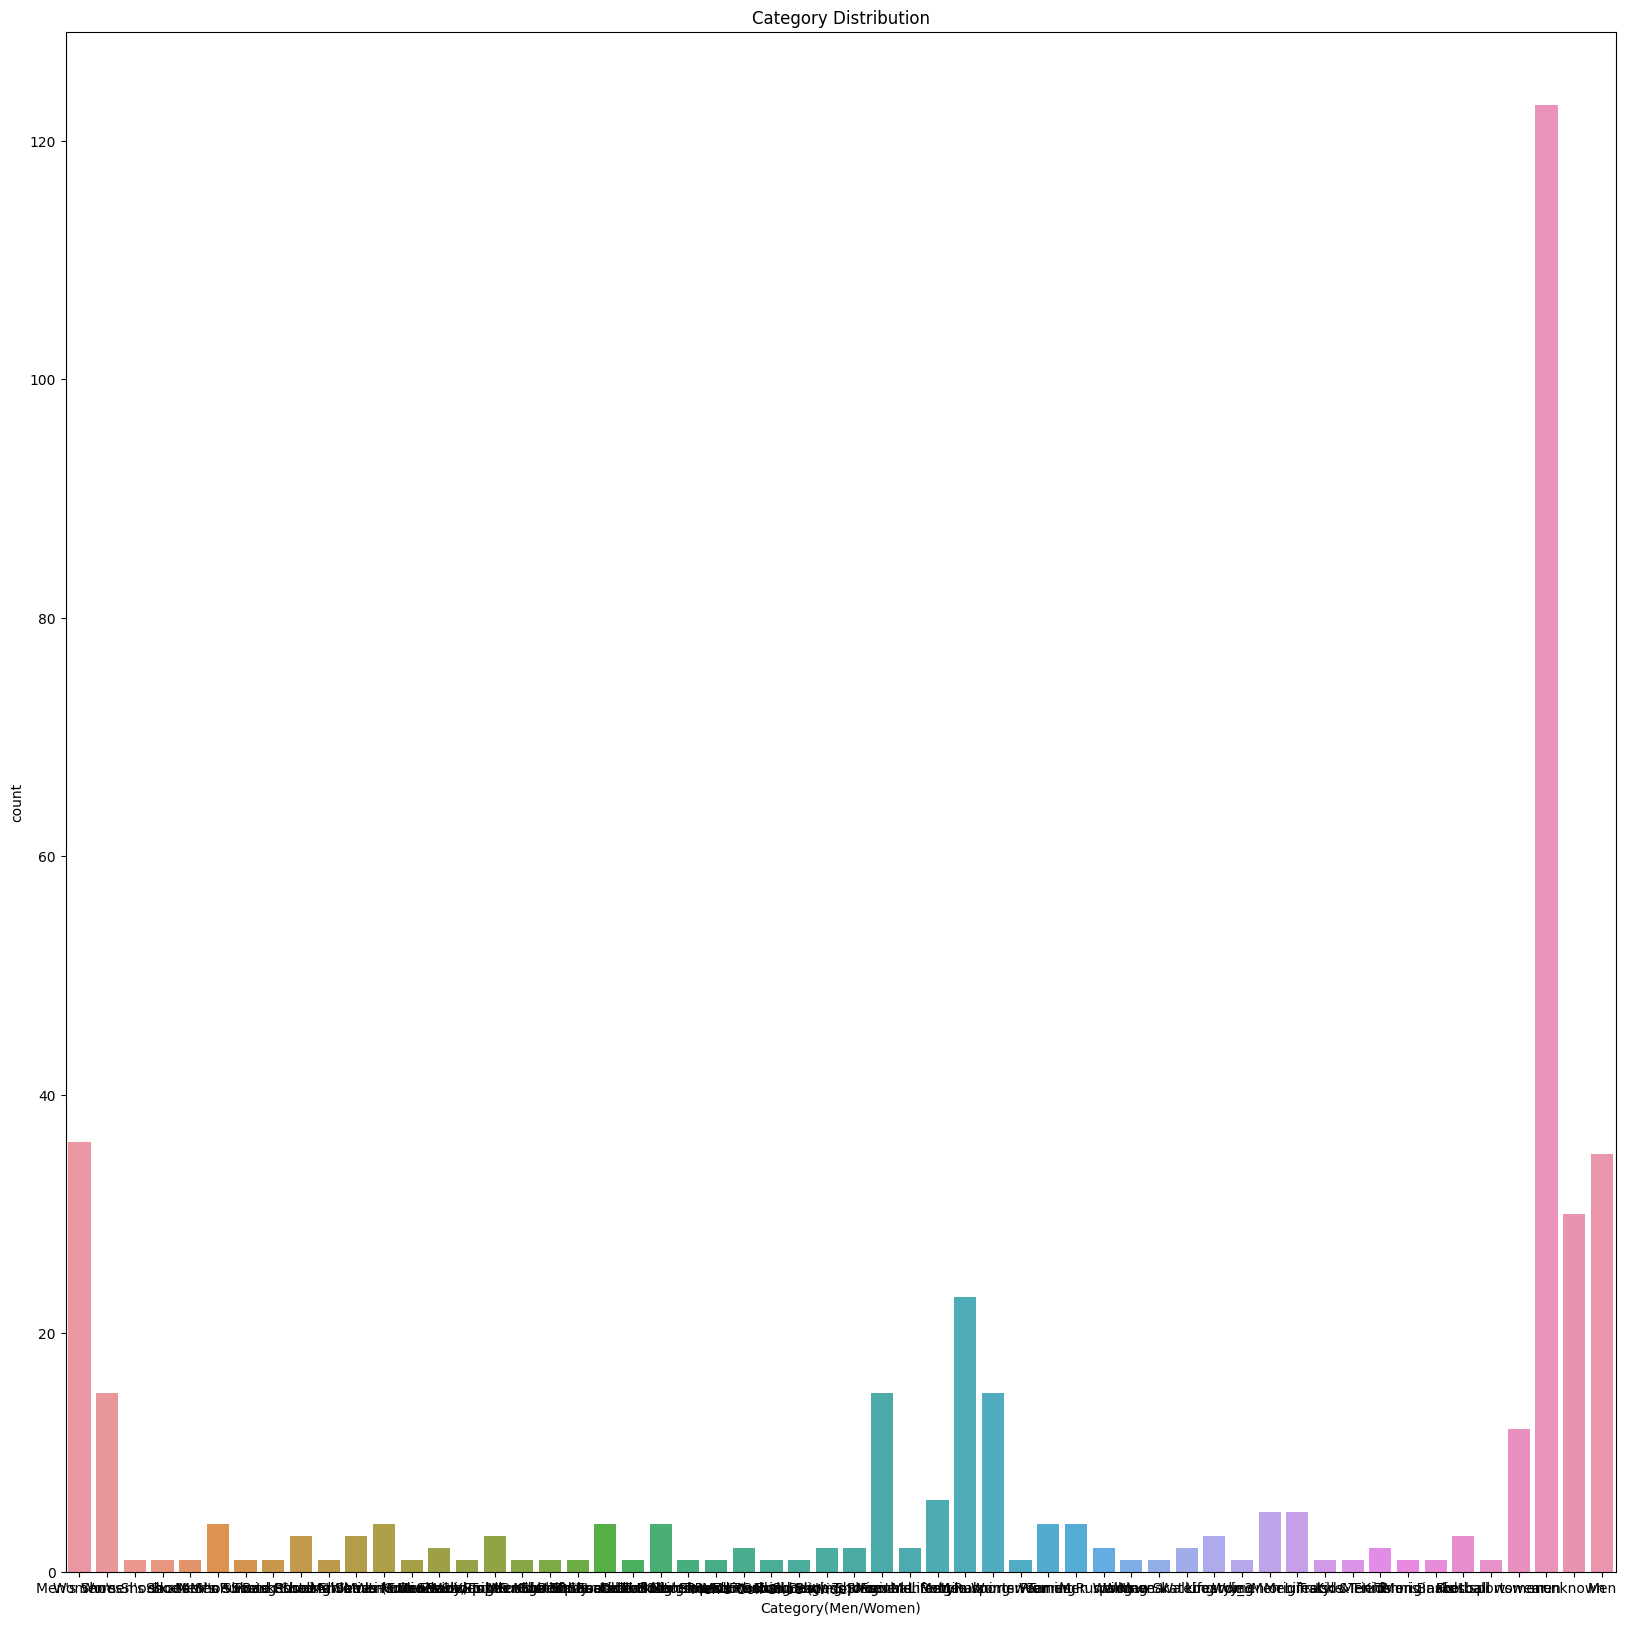

In [22]:
# distribution of Category value

plt.figure(figsize=(20,20))
sns.countplot(x='Category(Men/Women)', data=data)
plt.title('Category Distribution')


<Axes: xlabel='Sizes', ylabel='Price in Rs'>

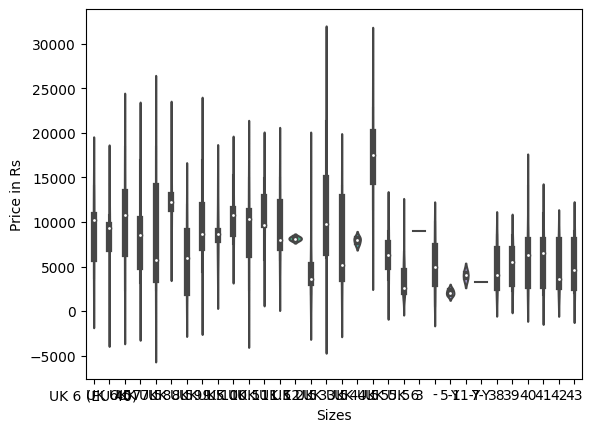

In [23]:
# size vs price

sns.violinplot(data=data, x='Sizes', y='Price in Rs')

<Axes: xlabel='Category(Men/Women)', ylabel='Price in Rs'>

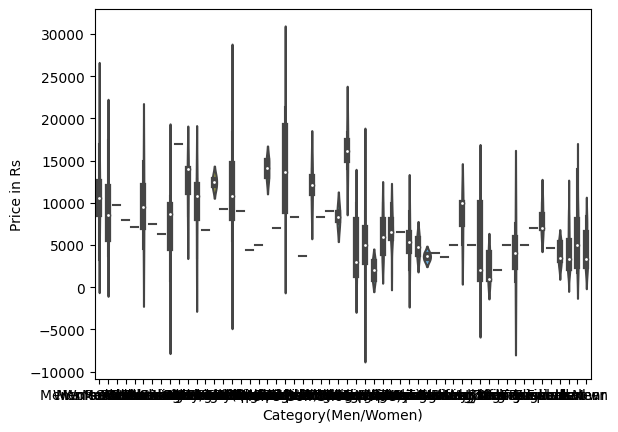

In [24]:
sns.violinplot(data=df, x='Category(Men/Women)', y='Price in Rs')

## Corelation Matrix

<Axes: >

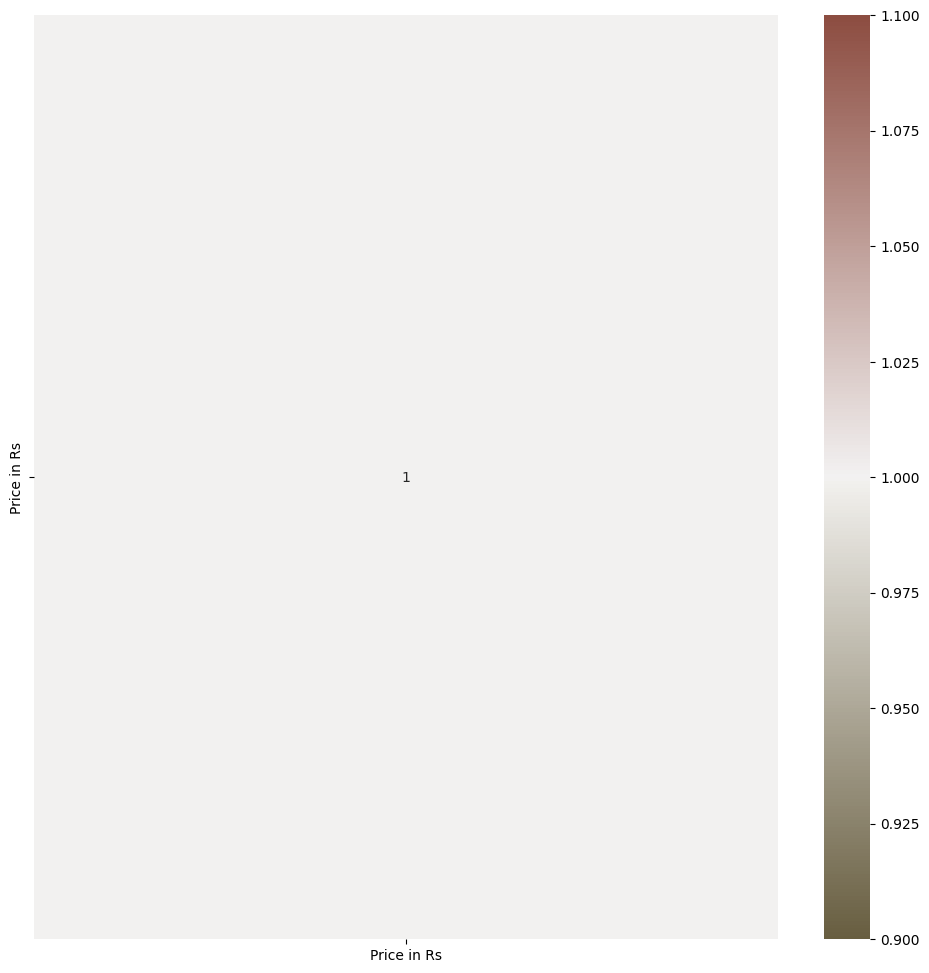

In [26]:
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True,)

### Dropping Irrelevant Columns

In [29]:
data.drop(['No. of reviews','Style_code','No. of stars'], axis = 1, inplace=True)
data.head()

,ShoeName,Category(Men/Women),no of colors,Price in Rs,Sizes
0,Nike Air Force 1 '07 LV8,Men's Shoes,1 Colour,10795.0,UK 6 (EU 40)
1,Nike Air Force 1 Shadow,Women's Shoes,1 Colour,9295.0,UK 6.5
2,NikeCourt Legacy Suede,Men's Shoes,1 Colour,5995.0,UK 7
3,Nike Air Force 1 '07,Men's Shoes,2 Colours,11895.0,UK 7.5
4,NikeCourt Legacy Next Nature,Women's Shoes,4 Colours,5695.0,UK 8


### Train Test Splitting of Data

In [30]:
X1=data.drop('Price in Rs',axis=1).values
y1=data['Price in Rs'].values